In [1]:
using Distributions

using Plots

using Posets

# Funciones

In [2]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end
function compara_rankingsypdp(pdp, puntuaciones)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    
    [energia_local(r, pdp) for r in ranks]
end

compara_rankingsypdp (generic function with 1 method)

In [3]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)
metodom2 = x -> x |> m2 |> pareja_matrizadyacencia
metodom3 = x -> x |> m3 |> pareja_matrizadyacencia

#23 (generic function with 1 method)

In [4]:
mat = [1. .3; .3 1.]
matsesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

# Datos

## Energia local con metodos

In [5]:
ejemplo = [generapuntuaciones_gaussian(10,7,2;lousy=1.0)[2] for _ in 1:10^3];

In [6]:
anima_corte0p98_nruido = [metametodo(corte0p98, ej, true) for ej in ejemplo];
anima_corte0p95_nruido = [metametodo(corte0p95, ej, true) for ej in ejemplo];
anima_corte0p90_nruido = [metametodo(corte0p90, ej, true) for ej in ejemplo];
anima_corte0p80_nruido = [metametodo(corte0p80, ej, true) for ej in ejemplo];

In [7]:
ejemplo_nonoise = [generapuntuaciones_gaussian(10,7,2)[2] for _ in 1:10^3];

In [8]:
anima_corte0p98 = [metametodo(corte0p98, ej, true) for ej in ejemplo_nonoise];
anima_corte0p95 = [metametodo(corte0p95, ej, true) for ej in ejemplo_nonoise];
anima_corte0p90 = [metametodo(corte0p90, ej, true) for ej in ejemplo_nonoise];
anima_corte0p80 = [metametodo(corte0p80, ej, true) for ej in ejemplo_nonoise];

## Energia local pdp vs sus rankings + ruido

In [9]:
ejemplo_nonoise_pdp = [generapuntuaciones_gaussian(10,7,2) for _ in 1:10^3];

In [10]:
comparativa_rankspdp = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in ejemplo_nonoise_pdp];

In [11]:
ejemplo_noise_pdp = [generapuntuaciones_gaussian(10,7,2;lousy = 1.0) for _ in 1:10^3];

In [12]:
lista_grande = [[generapuntuaciones_gaussian(10,7,2;lousy = ss) for _ in 1:10^3] for ss in [0.5 1.0 1.5 2.0 2.5 3.0]];

In [13]:
comparativa_rankspdp_connruido = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in ejemplo_noise_pdp];

In [14]:
comparativa_rankspdp_connruido0p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[1]];

comparativa_rankspdp_connruido1p0 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[2]];

comparativa_rankspdp_connruido1p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[3]];

comparativa_rankspdp_connruido2p0 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[4]];

comparativa_rankspdp_connruido2p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[5]];

In [15]:
comparativa_rankspdp_connruido3p0 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[6]];

In [16]:
comparativa_rankspdp_connruido = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in ejemplo_noise_pdp];

## Comparar posets

In [17]:
datos_comprarpdpconmetodo_ruido0p5_alfa0p7 = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p8 = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p9 = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
# comparativa_rankspdp_connruido1p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[2]];

# comparativa_rankspdp_connruido1p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[3]];

# comparativa_rankspdp_connruido2p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[4]];

# comparativa_rankspdp_connruido2p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[5]];


In [18]:
datos_comprarpdpconmetodo_ruido0p5_alfa0p7 = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p8 = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p9 = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p95 = [metametodo_poset(corte0p95, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
# comparativa_rankspdp_connruido1p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[2]];

# comparativa_rankspdp_connruido1p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[3]];

# comparativa_rankspdp_connruido2p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[4]];

# comparativa_rankspdp_connruido2p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[5]];


In [19]:
datos_comprarpdpconmetodo_ruido1p0_alfa0p7 = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];
datos_comprarpdpconmetodo_ruido1p0_alfa0p8 = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];
datos_comprarpdpconmetodo_ruido1p0_alfa0p9 = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];
datos_comprarpdpconmetodo_ruido1p0_alfa0p95 = [metametodo_poset(corte0p95, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];

In [20]:
datos_comprarpdpconmetodo_ruido1p5_alfa0p7  = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_alfa0p8  = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_alfa0p9  = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_alfa0p95 = [metametodo_poset(corte0p95, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];

In [21]:
datos_comprarpdpconmetodo_ruido1p5_m2  = [metametodo_poset(metodom2, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_m3  = [metametodo_poset(metodom3, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];

In [22]:
datos_comprarpdpconmetodo_ruido1p5_m2  = [metametodo_poset(metodom2, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];

## Sesgo

Se va  acomparar el pdp con los rankings

In [23]:
datos_ruido_sinsesgo = [generapuntuaciones_gaussian(10,7,2;lousy = 1.0) for _ in 1:10^3];

In [24]:
datos_ruido_consesgo = [generapuntuaciones_gaussian(10,7,2;lousy = 1.0,matnodos=matsesgada) for _ in 1:10^3];

In [25]:
comparativa_rankspdp_sinsesgo = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_sinsesgo];

In [26]:
comparativa_rankspdp_consesgo = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_consesgo];

# Resultados

## Sesgo

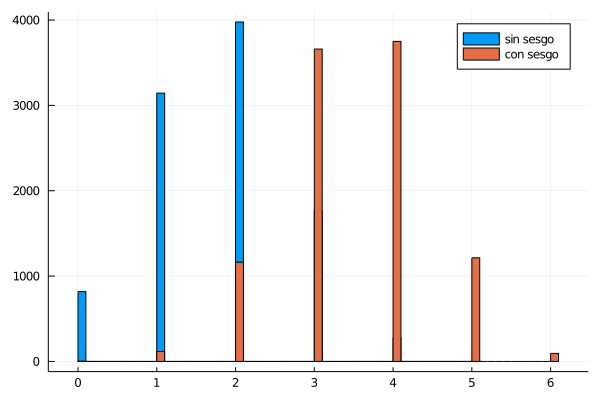

In [27]:
histogram([vcat(comparativa_rankspdp_sinsesgo...),vcat(comparativa_rankspdp_consesgo...)],labels=["sin sesgo" "con sesgo"])

## Otros

In [28]:
vcat(comparativa_rankspdp...) |> countmap

Dict{Int64,Int64} with 6 entries:
  0 => 1154
  4 => 755
  2 => 3088
  3 => 2016
  5 => 111
  1 => 2876

In [29]:
vcat(comparativa_rankspdp_connruido...) |> countmap

Dict{Int64,Int64} with 6 entries:
  0 => 875
  4 => 299
  2 => 3824
  3 => 1768
  5 => 21
  1 => 3213

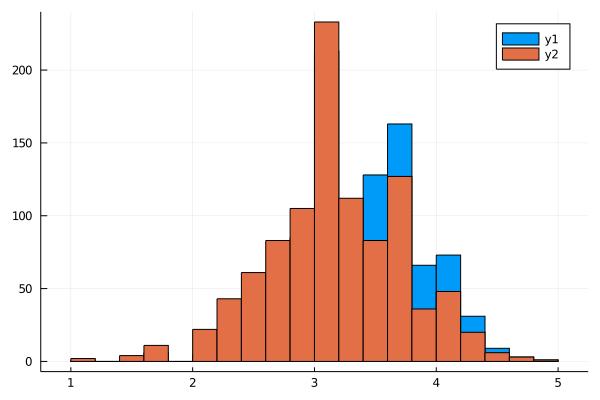

In [30]:
histogram([vcat(datos_comprarpdpconmetodo_ruido1p5_m2...),vcat(datos_comprarpdpconmetodo_ruido1p5_m3...)])

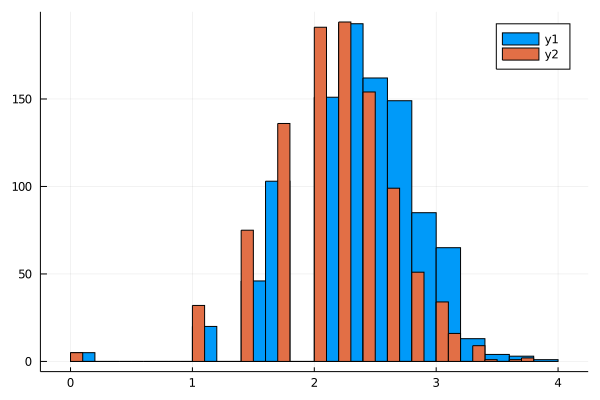

In [31]:
histogram([vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p9...),vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p95...)])

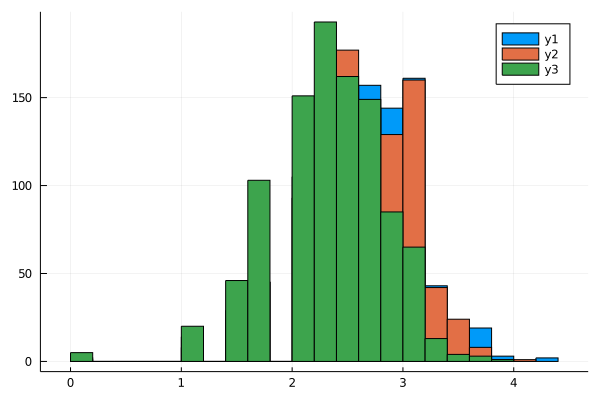

In [32]:
histogram([vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p7...),vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p8...),vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p9...)])

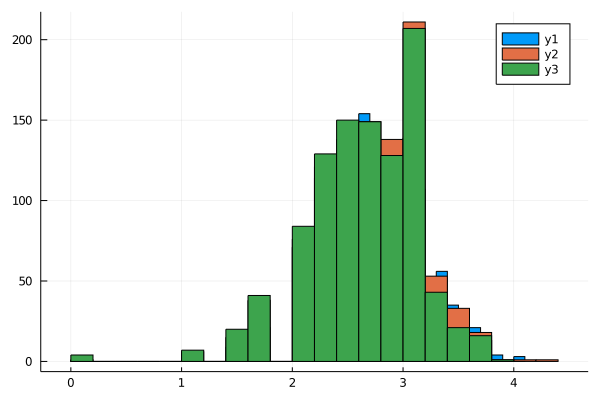

In [33]:
histogram([vcat(datos_comprarpdpconmetodo_ruido1p0_alfa0p7...),vcat(datos_comprarpdpconmetodo_ruido1p0_alfa0p8...),vcat(datos_comprarpdpconmetodo_ruido1p0_alfa0p9...)])

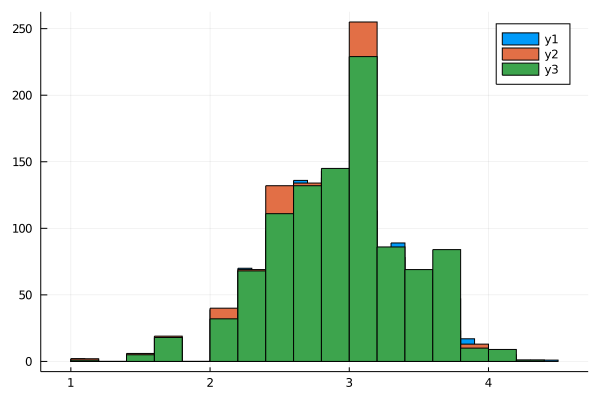

In [34]:
histogram([vcat(datos_comprarpdpconmetodo_ruido1p5_alfa0p7...),vcat(datos_comprarpdpconmetodo_ruido1p5_alfa0p8...),vcat(datos_comprarpdpconmetodo_ruido1p5_alfa0p9...)])

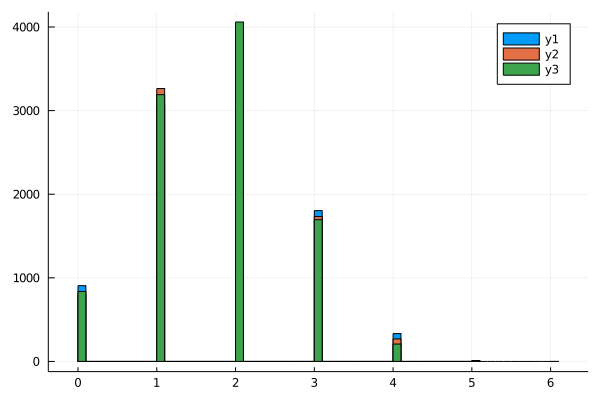

In [35]:
histogram([vcat(comparativa_rankspdp_connruido0p5...),vcat(comparativa_rankspdp_connruido1p0...),vcat(comparativa_rankspdp_connruido1p5...)])

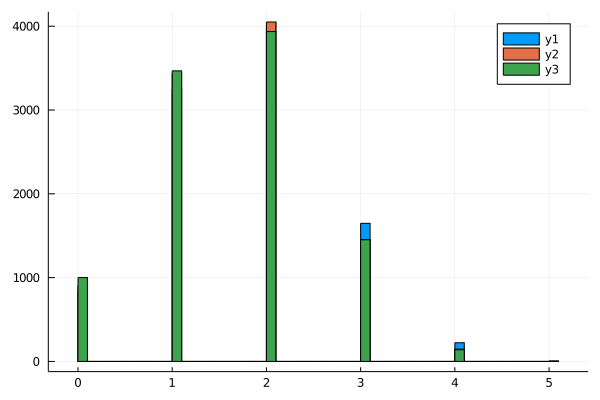

In [36]:
histogram([vcat(comparativa_rankspdp_connruido2p0...),vcat(comparativa_rankspdp_connruido2p5...),vcat(comparativa_rankspdp_connruido3p0...)])

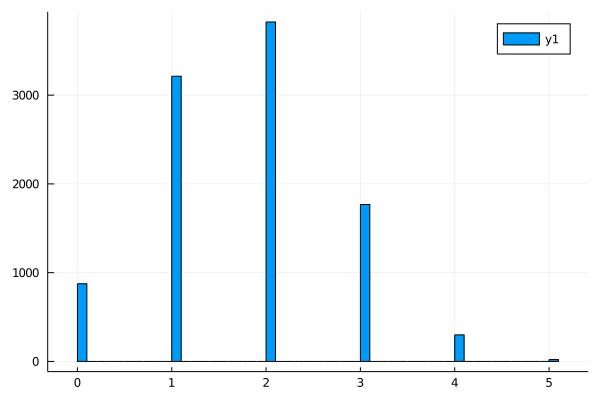

In [37]:
vcat(comparativa_rankspdp_connruido...) |> histogram

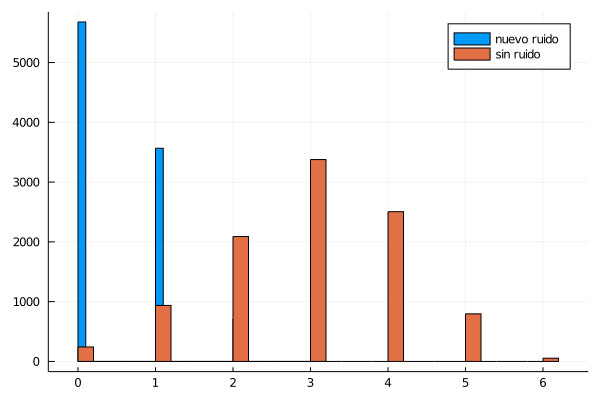

In [38]:
histogram([vcat(anima_corte0p98_nruido...), vcat(anima_corte0p98...)], labels = ["nuevo ruido" "sin ruido"])